In [9]:
%matplotlib inline
import numpy as np
import random as rand
import matplotlib.pyplot as plt
dimensions=5
testTimes=2000
updateFactor=1
maxUpdateTimes=50

In [10]:
x=[];
x2=[];
for i in range(dimensions):
    x.append([]);
    x2.append([]);
y=[];
y2=[];
pocketErrorTimesRecord=[]

In [11]:
#read training data
with open('hw1_18_train.txt') as f:
    for line in f:
        for i,value in enumerate(line.split()):
            if i<4:
                x[i+1].append(float(value));
            else:
                y.append(int(value));
    f.close();
x[0]=np.ones(len(x[1]));

In [12]:
#read testing data
with open('hw1_18_test.txt') as f:
    for line in f:
        for i,value in enumerate(line.split()):
            if i<4:
                x2[i+1].append(float(value));
            else:
                y2.append(int(value));
    f.close();
x2[0]=np.ones(len(x2[1]));

In [13]:
for times in range(testTimes):
    w=np.zeros(dimensions)
    pocketW=w
    pocketErrorTimes=len(x2[0])
    #update counter
    updates=0
    #while True:
    while updates<maxUpdateTimes:
        randomNum=rand.choice(list(range(len(x[0]))))
        #isUpdate=False;
        innerProduct=0
        for k in range(dimensions):
            innerProduct=innerProduct+w[k]*x[k][randomNum]
        #if error, update w
        if (innerProduct<=0)!= (y[randomNum]<0):
            for k in range(dimensions):
                w[k]=w[k]+updateFactor*y[randomNum]*x[k][randomNum]
            updates=updates+1
            #check if update pocketW
            testErrorCount=0
            for j2 in range(len(x2[0])):
                innerProduct=0;
                for k in range(dimensions):
                    innerProduct=innerProduct+w[k]*x2[k][j2]
                if (innerProduct<=0)!= (y2[j2]<0):
                    testErrorCount+=1
            if testErrorCount<pocketErrorTimes:
                pocketW=w
                pocketErrorTimes=testErrorCount
    pocketErrorTimesRecord.append(pocketErrorTimes)

In [14]:
print("Pocket average error rate:",sum(pocketErrorTimesRecord)/testTimes/len(x2[0]))

Pocket average error rate: 0.129247


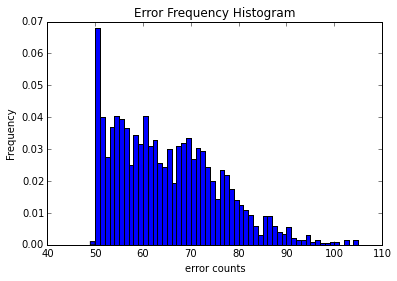

In [15]:
plt.hist(pocketErrorTimesRecord,bins=max(pocketErrorTimesRecord)-min(pocketErrorTimesRecord),normed=True)
plt.title("Error Frequency Histogram")
plt.xlabel("error counts")
plt.ylabel("Frequency")
plt.show()